1. Introduction to Databricks

In [0]:
# Basic operations
# Creating a sample dataset using Pandas
import pandas as pd

data = {'Name': ['John', 'Jane', 'Tom', 'Alice'],
        'Age': [23, 30, 35, 29],
        'Salary': [50000, 60000, 75000, 55000]}

df = pd.DataFrame(data)
print("Sample Data")
display(df)

# Simple calculation: Increase salary by 10%
df['Increased_Salary'] = df['Salary'] * 1.10
print("Data with Increased Salary:")
display(df)


Sample Data


Name,Age,Salary
John,23,50000
Jane,30,60000
Tom,35,75000
Alice,29,55000


Data with Increased Salary:


Name,Age,Salary,Increased_Salary
John,23,50000,55000.00000000001
Jane,30,60000,66000.0
Tom,35,75000,82500.0
Alice,29,55000,60500.00000000001


2. Setting Up Azure Databricks Workspace and Configuring Clusters

In [0]:
# Test cluster by running basic Python code
result = 10 + 20
print(f"Sum of 10 and 20: {result}")


Sum of 10 and 20: 30


In [0]:
dbutils.fs.cp("file:/Workspace/Shared/streaming_data.csv","dbfs:/FileStore/streaming_data.csv")

True

In [0]:
dbutils.fs.cp("file:/Workspace/Shared/sales_data2.csv","dbfs:/FileStore/sales_data2.csv")

True

In [0]:
dbutils.fs.cp("file:/Workspace/Shared/transaction_data.csv","dbfs:/FileStore/transaction_data.csv")

True

3. Real-Time Data Processing with Databricks

In [0]:

# Use spark.readStream to simulate real-time data processing.
schema="event_time TIMESTAMP, event_type STRING, user_id STRING, amount DOUBLE"
streamind_data=spark.readStream.format("csv").schema(schema).option("header","true").load("dbfs:/FileStore/")
# Real-time aggregation 
aggregated_data=(streamind_data.groupBy("event_type").agg({"amount":"sum"}).withColumnRenamed("sum(amount)","total_amount"))
query = (aggregated_data.writeStream
         .outputMode("complete")
         .format("console")
         .start())

4. Data Exploration and Visualization in Databricks

In [0]:

# Load a dataset and perform exploratory data analysis (EDA)
from pyspark.sql.functions import col
df = spark.read.csv("dbfs:/FileStore/sales_data2.csv", header=True, inferSchema=True)
df.groupBy("category").sum("amount").display()
df.select("amount", "quantity").display()


category,sum(amount)
books,992422.2399999988
furniture,1005168.5299999974
electronics,1015841.5399999978
clothing,1034667.2699999991
toys,1004014.2299999984


amount,quantity
274.08,19
282.48,6
756.3,8
331.44,4
533.77,2
462.65,17
223.61,13
361.29,8
692.52,12
813.56,14


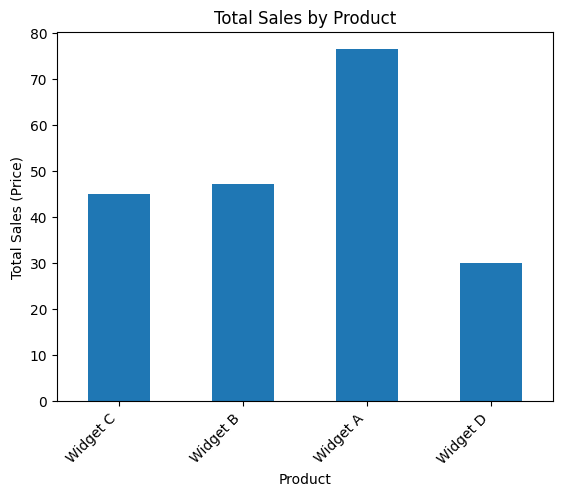

In [0]:
import matplotlib.pyplot as plt

# Convert the total sales per product to Pandas
df_pandas_category = df.groupBy("Product").agg({"Price": "sum"}).toPandas()

# Plot using Matplotlib
df_pandas_category.plot(kind='bar', x='Product', y='sum(Price)', legend=False)

# Customize the plot
plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales (Price)")
plt.xticks(rotation=45, ha='right')
plt.show()


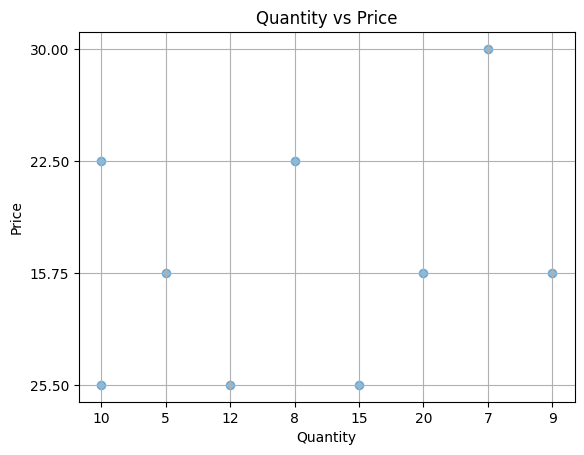

In [0]:
# Convert the necessary columns to Pandas
df_pandas_scatter = df.select("Quantity", "Price").toPandas()

# Plot using Matplotlib
plt.scatter(df_pandas_scatter['Quantity'], df_pandas_scatter['Price'], alpha=0.5)

# Customize the plot
plt.title("Quantity vs Price")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.grid(True)
plt.show()


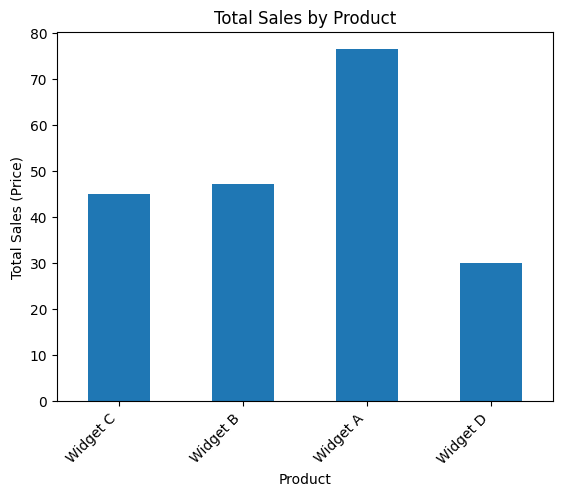

In [0]:
# Convert the total sales per product to Pandas
df_pandas_customer = df.groupBy("Product").agg({"Price": "sum"}).toPandas()

# Plot using Matplotlib
df_pandas_customer.plot(kind='bar', x='Product', y='sum(Price)', legend=False)

# Customize the plot
plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales (Price)")
plt.xticks(rotation=45, ha='right')
plt.show()


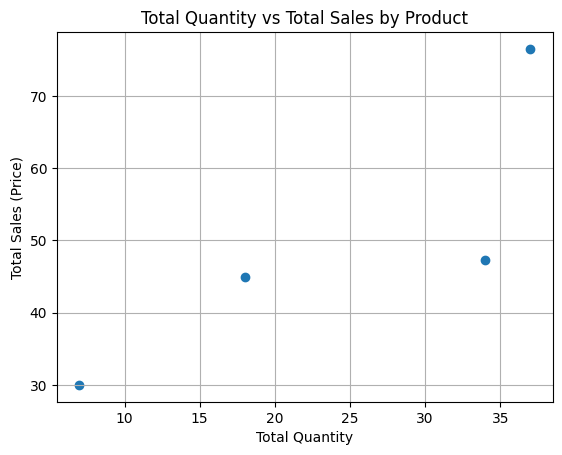

In [0]:
# Group by product, sum the quantity and price, and convert to Pandas
df_pandas_quantity_vs_sales = df.groupBy("Product") \
    .agg({"Quantity": "sum", "Price": "sum"}).toPandas()

# Plot using Matplotlib
plt.scatter(df_pandas_quantity_vs_sales['sum(Quantity)'], df_pandas_quantity_vs_sales['sum(Price)'])

# Customize the plot
plt.title("Total Quantity vs Total Sales by Product")
plt.xlabel("Total Quantity")
plt.ylabel("Total Sales (Price)")
plt.grid(True)
plt.show()


6. Reading and Writing Data in Databricks

In [0]:

# Read data in different formats and write it to Delta, Parquet, and JSON
# Reading CSV file
df_csv = spark.read.csv("dbfs:/FileStore/sales_data2.csv", header=True, inferSchema=True)
# Writing to Delta format
df_csv.write.format("delta").save("dbfs:/FileStore/delta_table")
print("Writing to the delta table completed")
# Writing to Parquet
df_csv.write.parquet("dbfs:/FileStore/parquet_table")
print("Writing to the parquet file completed")
# Writing to JSON
df_csv.write.json("dbfs:/FileStore/json_table")
print("Writing to the json file completed")

Writing to the delta table completed
Writing to the parquet file completed
Writing to the json file completed


7. Analyzing and Visualizing Streaming Data with Databricks

In [0]:

# Use Spark streaming to analyze and visualize streaming data in real time
streaming_data = (spark.readStream.format("csv").option("header", "true").schema(schema).load("dbfs:/FileStore/"))

streaming_data_with_watermark = streaming_data.withWatermark("event_time", "10 minutes")

# Real-time visualization of total amount over time
streaming_data_with_watermark.groupBy("event_time").sum("amount").writeStream.outputMode("append").format("console").start()

8.Introduction to Databricks Delta Lake

In [0]:
df.write.format("delta").save("/mnt/data/delta_table")


In [0]:
# Load specific version

df_v0 = spark.read.format("delta").option("versionAsOf", 0).load("/mnt/data/delta_table")

In [0]:
# Optimize Delta table
spark.sql("OPTIMIZE delta.`/mnt/data/delta_table` ZORDER BY (amount)")


DataFrame[path: string, metrics: struct<numFilesAdded:bigint,numFilesRemoved:bigint,filesAdded:struct<min:bigint,max:bigint,avg:double,totalFiles:bigint,totalSize:bigint>,filesRemoved:struct<min:bigint,max:bigint,avg:double,totalFiles:bigint,totalSize:bigint>,partitionsOptimized:bigint,zOrderStats:struct<strategyName:string,inputCubeFiles:struct<num:bigint,size:bigint>,inputOtherFiles:struct<num:bigint,size:bigint>,inputNumCubes:bigint,mergedFiles:struct<num:bigint,size:bigint>,numOutputCubes:bigint,mergedNumCubes:bigint>,clusteringStats:struct<inputZCubeFiles:struct<numFiles:bigint,size:bigint>,inputOtherFiles:struct<numFiles:bigint,size:bigint>,inputNumZCubes:bigint,mergedFiles:struct<numFiles:bigint,size:bigint>,numOutputZCubes:bigint>,numBins:bigint,numBatches:bigint,totalConsideredFiles:bigint,totalFilesSkipped:bigint,preserveInsertionOrder:boolean,numFilesSkippedToReduceWriteAmplification:bigint,numBytesSkippedToReduceWriteAmplification:bigint,startTimeMs:bigint,endTimeMs:bigint,

9. Managed and Unmanaged Tables

In [0]:

df.write.saveAsTable("managed_table_1")

# Creating an unmanaged table (external location)
df.write.option("dbfs:/FileStore/sales_data_2", "/mnt/sales_data").saveAsTable("unmanaged_sales")

# Selecting data
spark.sql("SELECT * FROM managed_table_1").show()

+--------------+-----------+------+--------+-----------+
|transaction_id|   category|amount|quantity|customer_id|
+--------------+-----------+------+--------+-----------+
|             1|   clothing|274.08|      19|       5622|
|             2|      books|282.48|       6|       9363|
|             3|   clothing| 756.3|       8|       1750|
|             4|   clothing|331.44|       4|       5916|
|             5|  furniture|533.77|       2|       5679|
|             6|  furniture|462.65|      17|       9939|
|             7|  furniture|223.61|      13|       5965|
|             8|      books|361.29|       8|       8995|
|             9|   clothing|692.52|      12|       5244|
|            10|  furniture|813.56|      14|       9397|
|            11|electronics|827.77|      15|       8967|
|            12|       toys|409.23|       9|       6482|
|            13|  furniture|462.51|      10|       5949|
|            14|   clothing|881.36|       3|       3818|
|            15|  furniture|790

10. Views and Temporary Views

In [0]:
# Creating a view
df.createOrReplaceTempView("temp_view")

# Creating a global temporary view
df.createOrReplaceGlobalTempView("global_temp_view")

# Querying the views
spark.sql("SELECT * FROM temp_view").show()
spark.sql("SELECT * FROM global_temp.global_temp_view").show()


+--------------+-----------+------+--------+-----------+
|transaction_id|   category|amount|quantity|customer_id|
+--------------+-----------+------+--------+-----------+
|             1|   clothing|274.08|      19|       5622|
|             2|      books|282.48|       6|       9363|
|             3|   clothing| 756.3|       8|       1750|
|             4|   clothing|331.44|       4|       5916|
|             5|  furniture|533.77|       2|       5679|
|             6|  furniture|462.65|      17|       9939|
|             7|  furniture|223.61|      13|       5965|
|             8|      books|361.29|       8|       8995|
|             9|   clothing|692.52|      12|       5244|
|            10|  furniture|813.56|      14|       9397|
|            11|electronics|827.77|      15|       8967|
|            12|       toys|409.23|       9|       6482|
|            13|  furniture|462.51|      10|       5949|
|            14|   clothing|881.36|       3|       3818|
|            15|  furniture|790